In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loads Excel datasets
crimes = pd.read_excel("/content/Crimes_Data.xlsx")
other = pd.read_excel("/content/Other_Data.xlsx")

# Previews datasets
print(crimes.head())
print(other.head())

# Removes duplicate rows
crimes = crimes.drop_duplicates()
other = other.drop_duplicates()

# Fills missing values
crimes['People Involved'] = crimes['People Involved'].fillna(0)
crimes['Resolved'] = crimes['Resolved'].fillna("Unknown")
other['People Involved'] = other['People Involved'].fillna(0)
other = other.fillna("None")

# Standardize column names
crimes.columns = [c.lower().replace(" ", "_") for c in crimes.columns]
other.columns = [c.lower().replace(" ", "_") for c in other.columns]

# Merges datasets on crime_id
crime_full = pd.merge(
    crimes,
    other,
    on='crime_id',
    how='left',
    suffixes=("_crime", "_other")
)

# Converts crime_date and crime_datetime to datetime objects with day first
crime_full['crime_date'] = pd.to_datetime(crime_full['crime_date'], dayfirst=True)
crime_full['crime_datetime'] = pd.to_datetime(crime_full['crime_datetime'], dayfirst=True)

# Extracts year and month for analysis
crime_full['year'] = crime_full['crime_date'].dt.year
crime_full['month'] = crime_full['crime_date'].dt.month

# Counts total people involved per crime
people_count = crime_full.groupby('crime_id')['person_id'].count().reset_index()
people_count.rename(columns={'person_id': 'total_people'}, inplace=True)

# Merges total people count back into main dataset
crime_full = pd.merge(crime_full, people_count, on='crime_id', how='left')

# Downloads the new clean file
crime_full.to_csv("/content/Crime_Full_Cleaned.csv", index=False)

   Crime ID Crime Date         Country  Longitude  Crime Type ID  Resolved  \
0         1 2021-09-01  United Kingdom        NaN              1         0   
1         2 2023-08-02          France        NaN              9         0   
2         3 2022-04-10         Germany        NaN             12         0   
3         4 2023-09-21           Italy        NaN             11         1   
4         5 2022-04-02           Spain        NaN             12         1   

   People Involved    Crime DateTime  
0                2  01.09.2021 02:00  
1                2  02.08.2023 17:30  
2                2  10.04.2022 22:35  
3                5  21.09.2023 01:45  
4                2  02.04.2022 20:40  
   Crime ID  People Involved  Crime Role ID  Person ID
0         1                2              1        782
1         1                2              5       3930
2         2                2              1         25
3         2                2              5       1036
4         3           

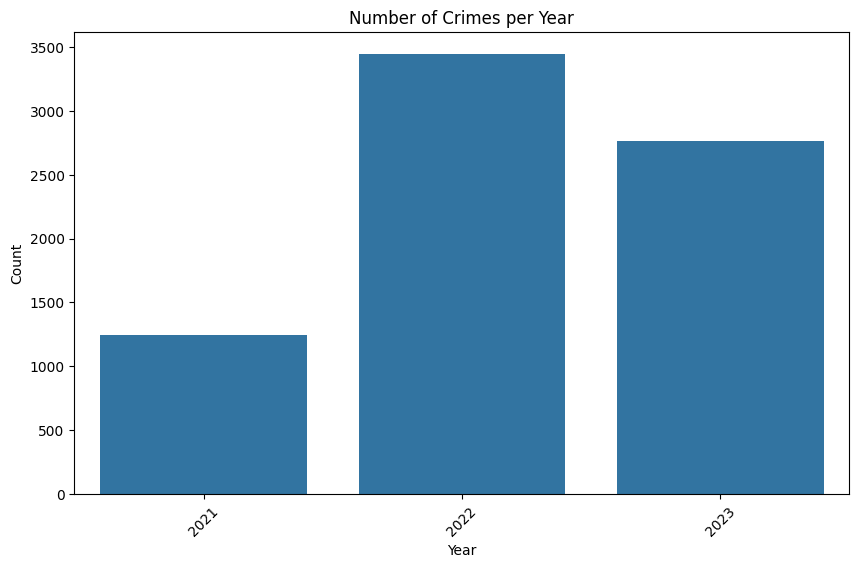

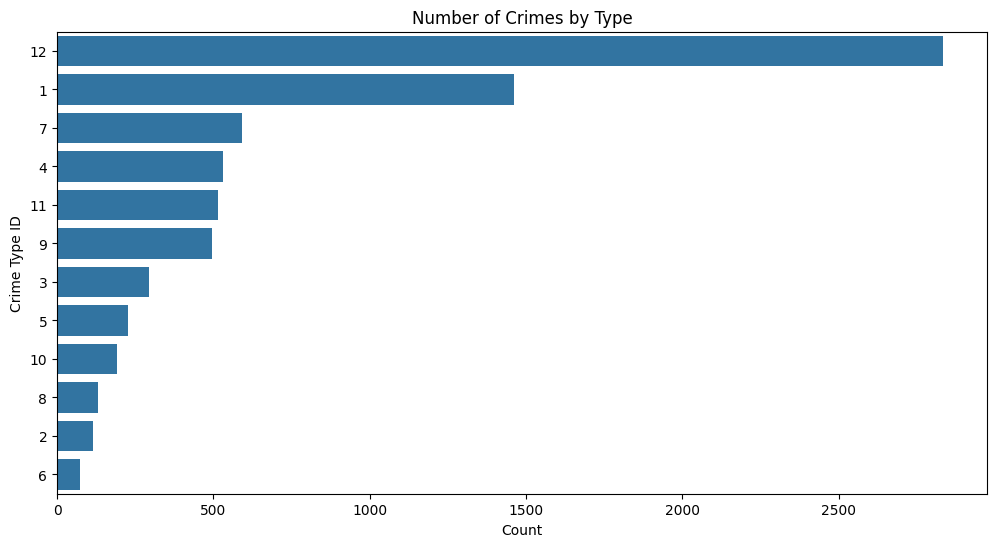

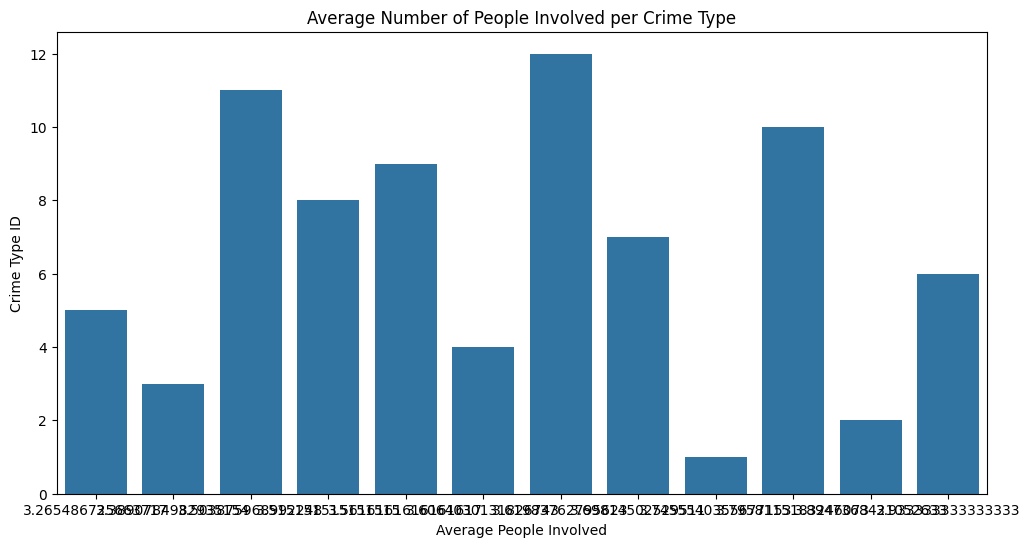

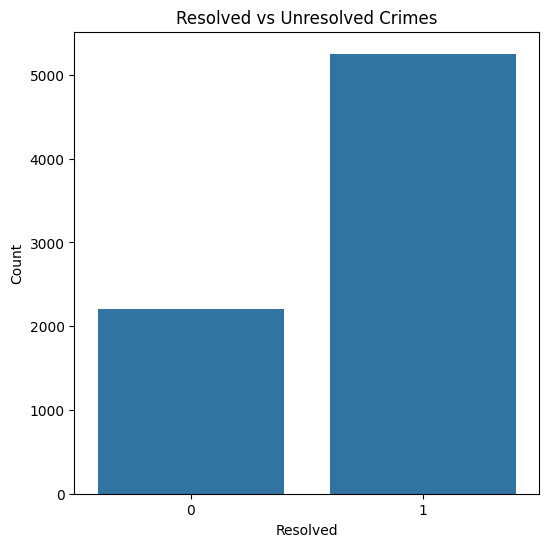

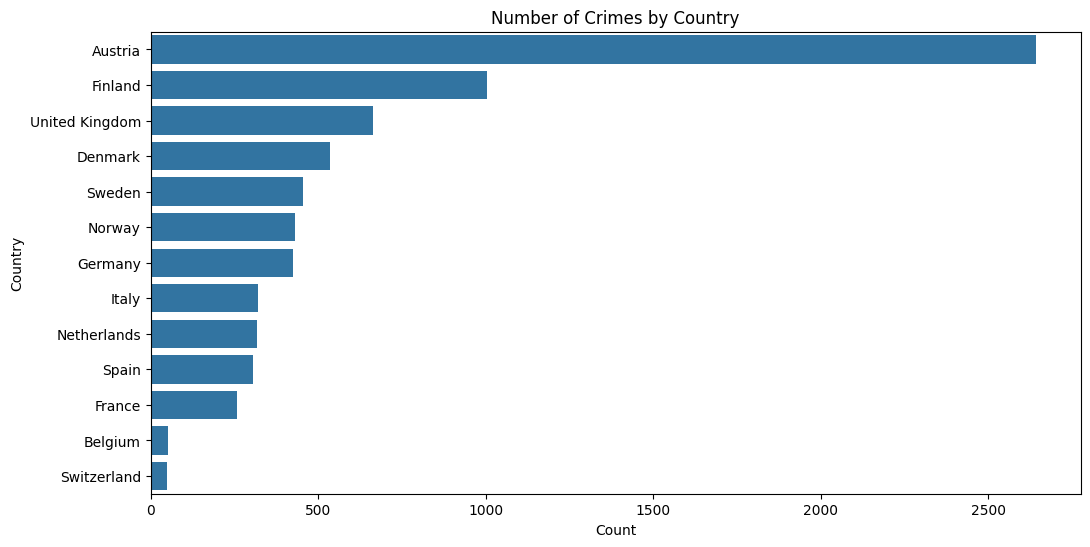

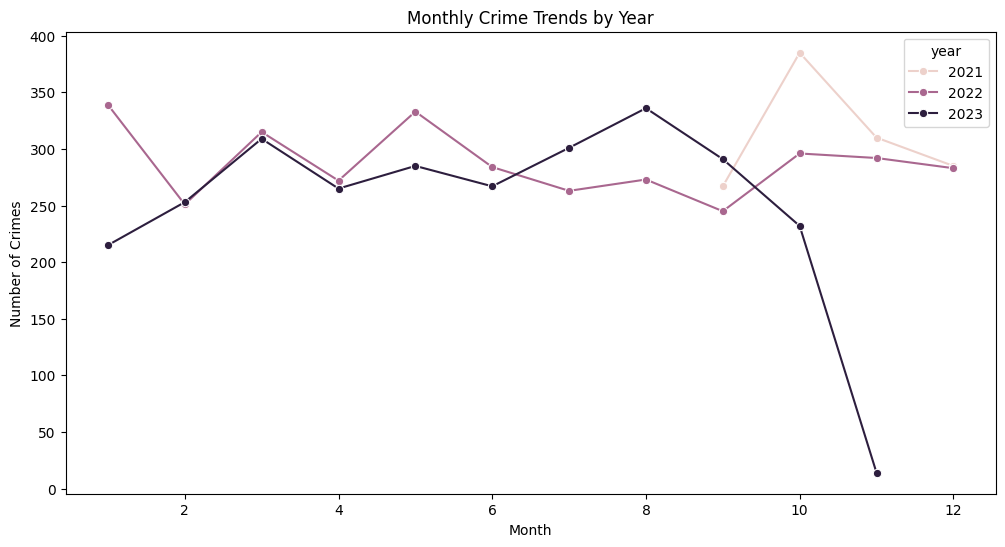

In [ ]:
# Plots number of crimes per year
plt.figure(figsize=(10,6))
sns.countplot(data=crime_full, x='year', order=sorted(crime_full['year'].dropna().unique()))
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plots number of crimes by crime type
plt.figure(figsize=(12,6))
sns.countplot(data=crime_full, y='crime_type_id', order=crime_full['crime_type_id'].value_counts().index)
plt.title("Number of Crimes by Type")
plt.xlabel("Count")
plt.ylabel("Crime Type ID")
plt.show()

# Plots average people involved per crime type
avg_people = crime_full.groupby('crime_type_id')['total_people'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_people.values, y=avg_people.index)
plt.title("Average Number of People Involved per Crime Type")
plt.xlabel("Average People Involved")
plt.ylabel("Crime Type ID")
plt.show()

# Plots resolved vs unresolved crimes
plt.figure(figsize=(6,6))
sns.countplot(data=crime_full, x='resolved')
plt.title("Resolved vs Unresolved Crimes")
plt.xlabel("Resolved")
plt.ylabel("Count")
plt.show()

# Plots crimes by country
plt.figure(figsize=(12,6))
sns.countplot(data=crime_full, y='country', order=crime_full['country'].value_counts().index)
plt.title("Number of Crimes by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Monthly crime trends
monthly_trends = crime_full.groupby(['year','month']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x='month', y='count', hue='year', marker="o")
plt.title("Monthly Crime Trends by Year")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()